In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
from sklearn.model_selection import train_test_split
import joblib
from sklearn.metrics import classification_report
import os

In [105]:
cols = ["MQ138 acetone C3H6O","MQ138 ethanol C2H5OH","MQ3 alcohol","MQ137 ammonia NH3","MQ135 ammonium NH4","MQ135 carbon dioxide CO2","MQ2 methane CH4","MQ4 methane CH4","MQ6 methane CH4","MQ8 hydrogen gas H2","MQ5 hydrogen gas H2","MQ2 hydrogen gas H2","MQ136 hydrogen sulfide H2S","temperature","humidity","Class"]
file_path = r'C:\Users\User\OneDrive\thesis\datasetV2.csv'  # Provide the full file path

df = pd.read_csv(file_path, names=cols)
df.head()

,MQ138 acetone C3H6O,MQ138 ethanol C2H5OH,MQ3 alcohol,MQ137 ammonia NH3,MQ135 ammonium NH4,MQ135 carbon dioxide CO2,MQ2 methane CH4,MQ4 methane CH4,MQ6 methane CH4,MQ8 hydrogen gas H2,MQ5 hydrogen gas H2,MQ2 hydrogen gas H2,MQ136 hydrogen sulfide H2S,temperature,humidity,Class
0,9.25668,3.5444,0.01006,0.10768,10.35147,10.67127,8.60268,17.94838,6.88758,733.97521,8.73906,10.19442,0.31789,33.1,37.0,Fresh
1,9.25668,3.5444,0.01006,0.10485,10.01575,10.27286,8.38920,17.94838,6.88758,723.25030,8.73906,9.99791,0.31039,33.1,37.0,Fresh
2,9.25668,3.5444,0.01006,0.10485,10.01575,10.27286,8.60268,17.94838,6.88758,723.25030,8.73906,10.19442,0.31039,33.1,37.0,Fresh
3,9.25668,3.5444,0.01006,0.10209,10.35147,10.67127,8.60268,17.94838,7.31638,733.97521,8.55896,10.19442,0.31039,33.1,37.0,Fresh
4,9.25668,3.5444,0.01006,0.10768,10.35147,10.67127,8.60268,17.94838,7.31638,733.97521,8.73906,10.19442,0.31039,33.1,37.0,Fresh


In [106]:
class_mapping = {'Fresh': 0, 'Rancid': 1, 'Spoiled': 2}
df['Class'] = df['Class'].replace(class_mapping)
df.head()

,MQ138 acetone C3H6O,MQ138 ethanol C2H5OH,MQ3 alcohol,MQ137 ammonia NH3,MQ135 ammonium NH4,MQ135 carbon dioxide CO2,MQ2 methane CH4,MQ4 methane CH4,MQ6 methane CH4,MQ8 hydrogen gas H2,MQ5 hydrogen gas H2,MQ2 hydrogen gas H2,MQ136 hydrogen sulfide H2S,temperature,humidity,Class
0,9.25668,3.5444,0.01006,0.10768,10.35147,10.67127,8.60268,17.94838,6.88758,733.97521,8.73906,10.19442,0.31789,33.1,37.0,0
1,9.25668,3.5444,0.01006,0.10485,10.01575,10.27286,8.38920,17.94838,6.88758,723.25030,8.73906,9.99791,0.31039,33.1,37.0,0
2,9.25668,3.5444,0.01006,0.10485,10.01575,10.27286,8.60268,17.94838,6.88758,723.25030,8.73906,10.19442,0.31039,33.1,37.0,0
3,9.25668,3.5444,0.01006,0.10209,10.35147,10.67127,8.60268,17.94838,7.31638,733.97521,8.55896,10.19442,0.31039,33.1,37.0,0
4,9.25668,3.5444,0.01006,0.10768,10.35147,10.67127,8.60268,17.94838,7.31638,733.97521,8.73906,10.19442,0.31039,33.1,37.0,0


Finding nan values

In [107]:
nan_counts = df.isna().sum()
print(nan_counts)

MQ138 acetone C3H6O            0
MQ138 ethanol C2H5OH          25
MQ3 alcohol                   25
MQ137 ammonia NH3             25
MQ135 ammonium NH4            25
MQ135 carbon dioxide CO2      26
MQ2 methane CH4               26
MQ4 methane CH4               26
MQ6 methane CH4               27
MQ8 hydrogen gas H2           28
MQ5 hydrogen gas H2           28
MQ2 hydrogen gas H2           29
MQ136 hydrogen sulfide H2S    29
temperature                   30
humidity                      34
Class                          0
dtype: int64


Filtering Rows or Columns with NaN: You can filter and examine rows or columns with NaN values.

In [108]:
df.dropna(axis=0, inplace=True)

In [109]:
nan_counts = df.isna().sum()
print(nan_counts)

MQ138 acetone C3H6O           0
MQ138 ethanol C2H5OH          0
MQ3 alcohol                   0
MQ137 ammonia NH3             0
MQ135 ammonium NH4            0
MQ135 carbon dioxide CO2      0
MQ2 methane CH4               0
MQ4 methane CH4               0
MQ6 methane CH4               0
MQ8 hydrogen gas H2           0
MQ5 hydrogen gas H2           0
MQ2 hydrogen gas H2           0
MQ136 hydrogen sulfide H2S    0
temperature                   0
humidity                      0
Class                         0
dtype: int64


In [110]:
# Handling Duplicates
df = df.drop_duplicates()

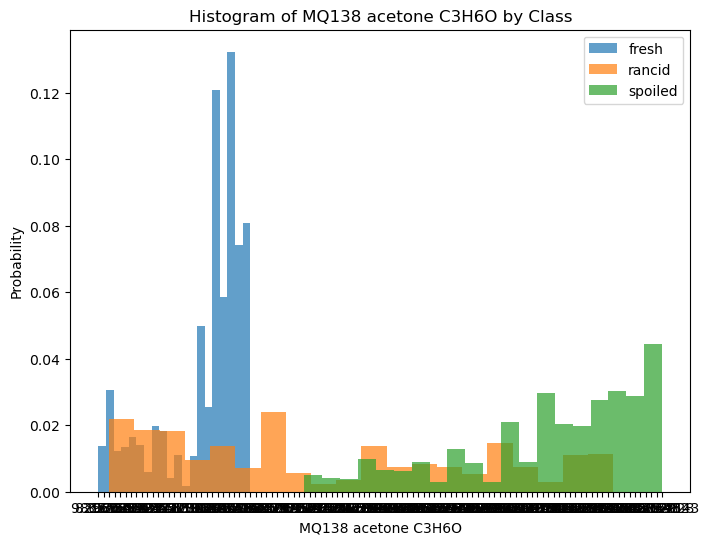

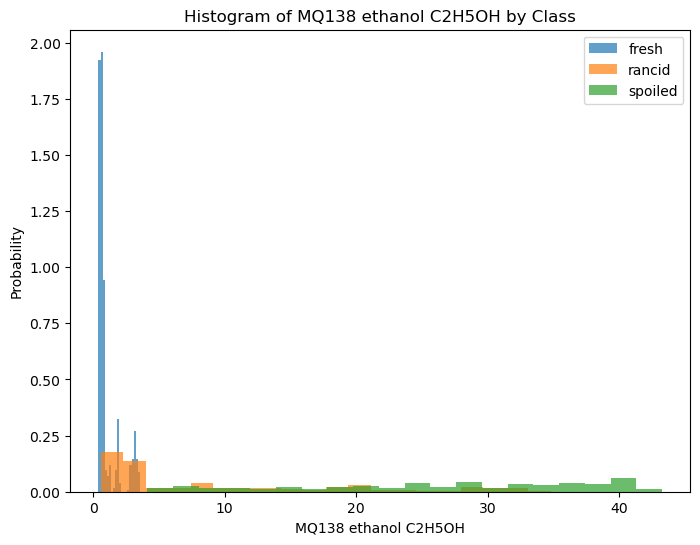

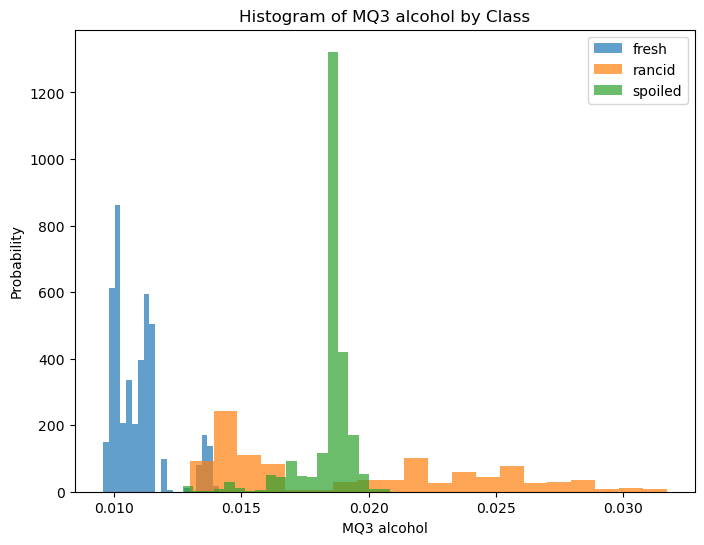

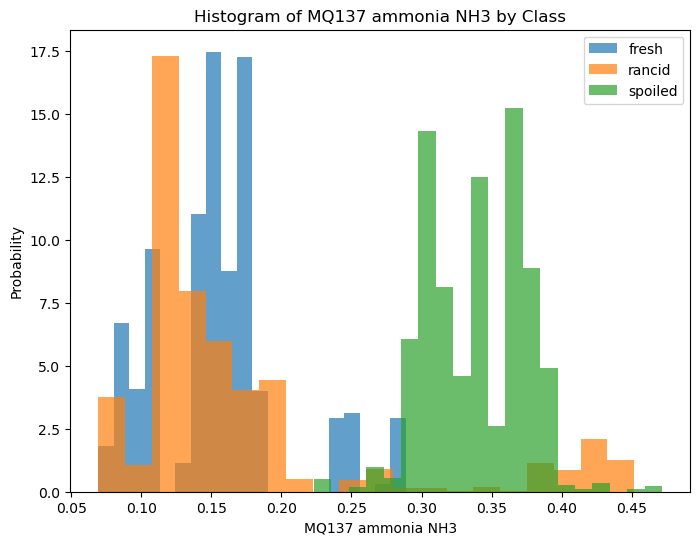

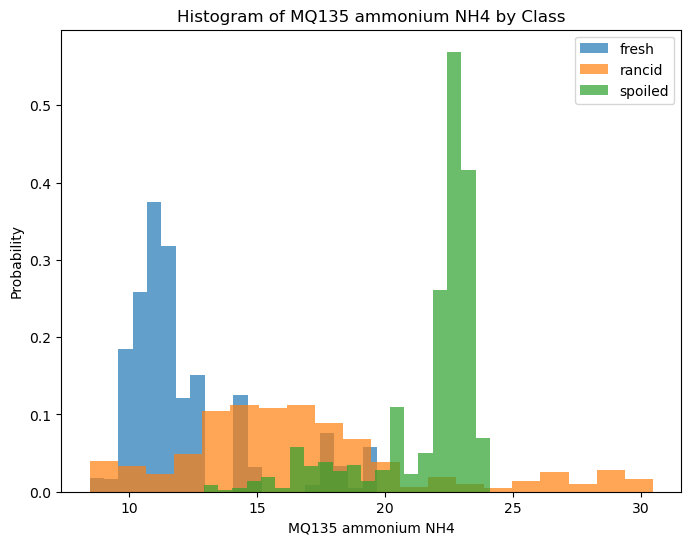

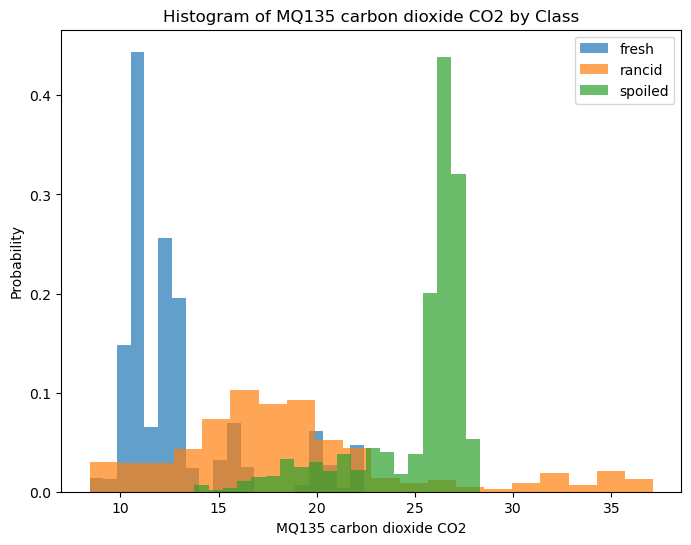

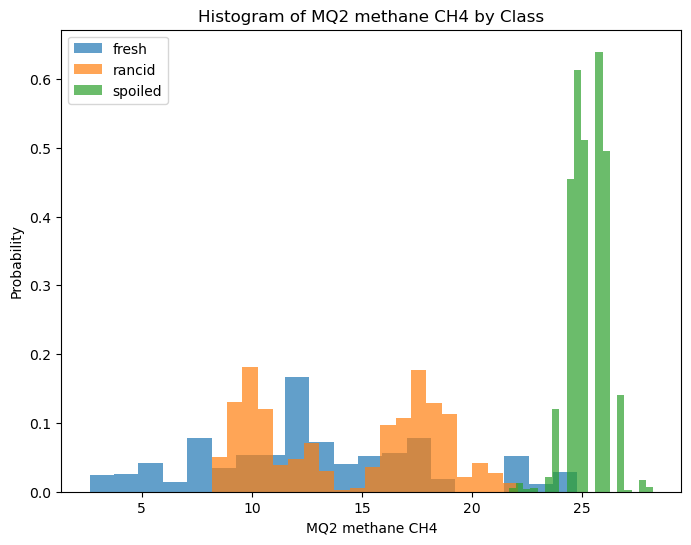

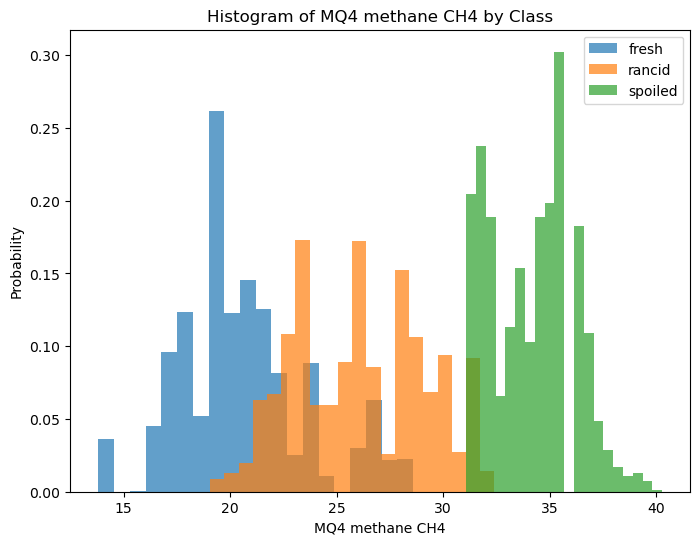

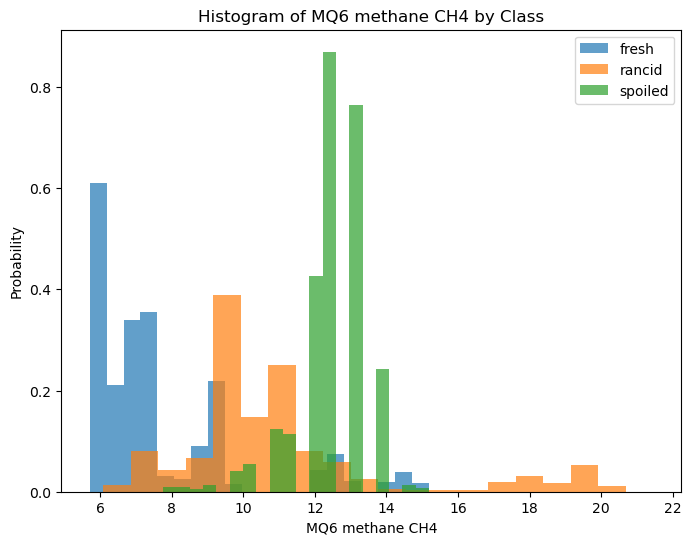

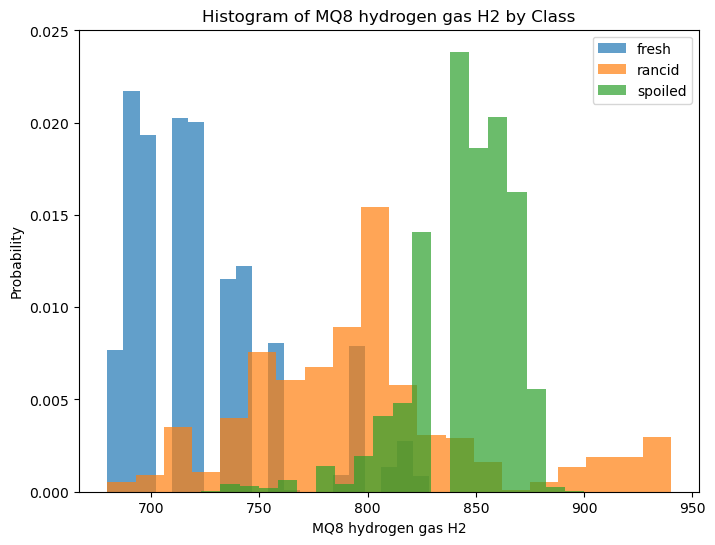

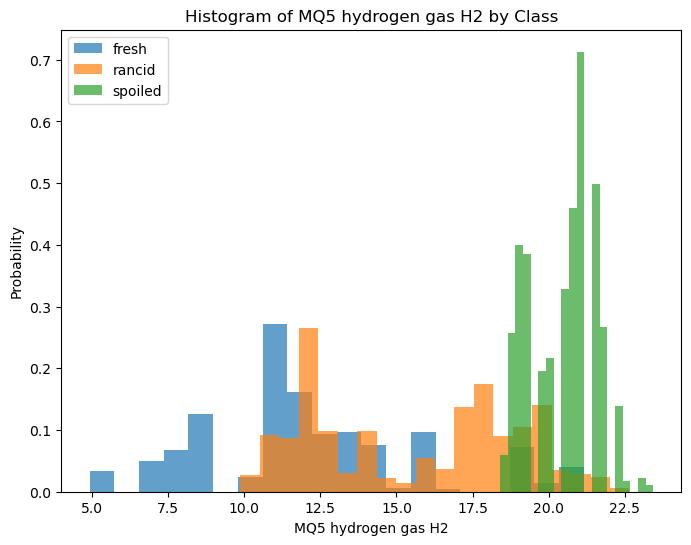

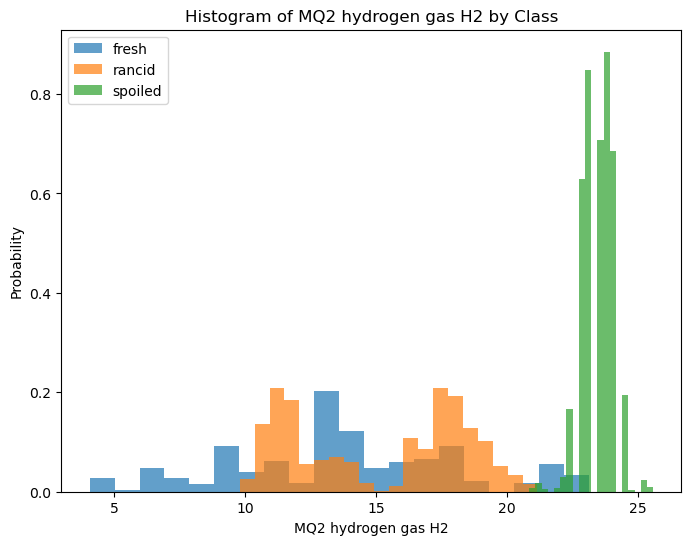

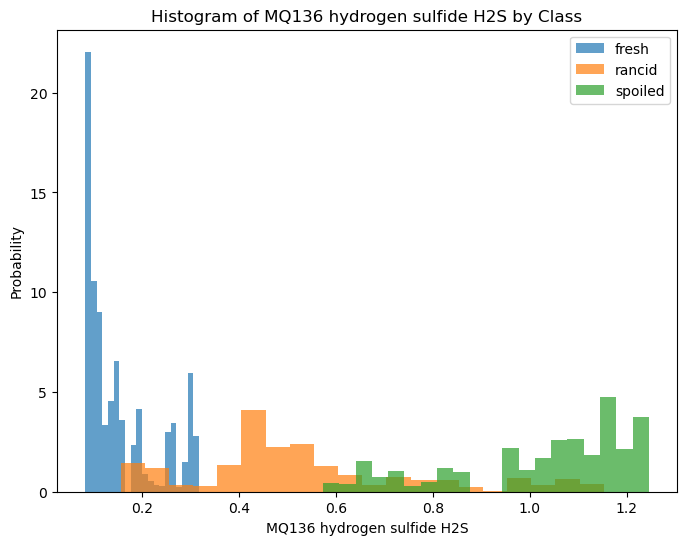

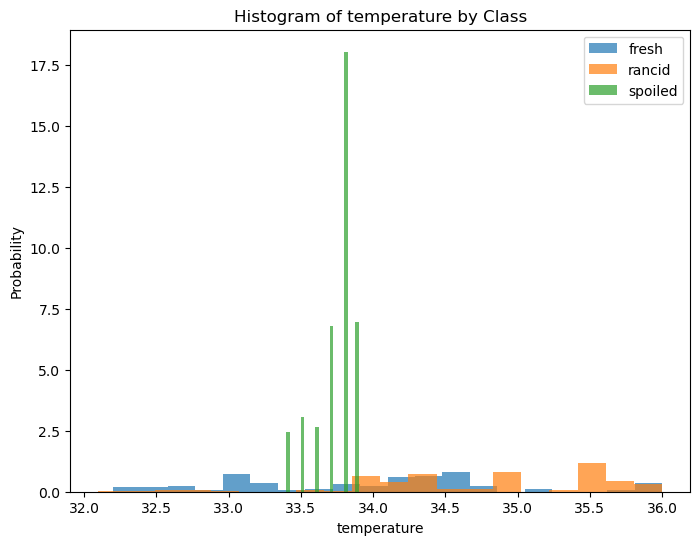

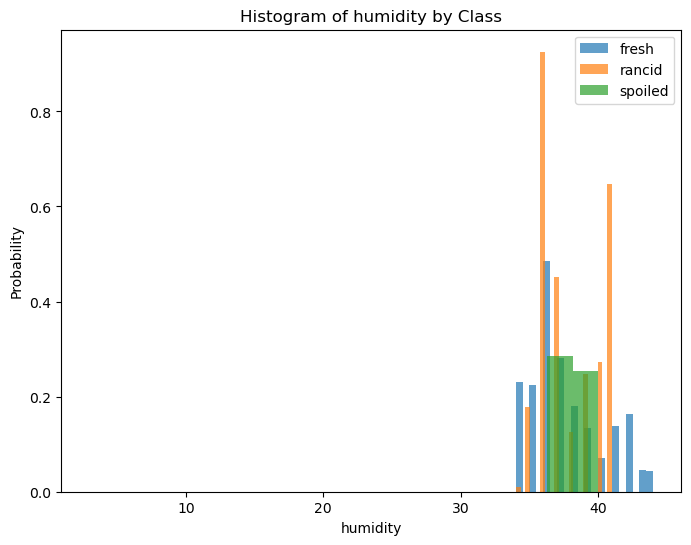

In [111]:
# Iterate through each feature in the 'cols' list
for label in cols[:-1]:
    # Create a separate plot for each feature
    plt.figure(figsize=(8, 6))

    # Plot histograms for each class (0, 1, 2)
    for class_label in [0, 1, 2]:
        class_name = ['fresh', 'rancid', 'spoiled'][class_label]
        plt.hist(df[df["Class"] == class_label][label], bins=20, alpha=0.7, label=class_name, density=True)

    # Set labels and legends
    plt.title(f'Histogram of {label} by Class')
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()

    # Show the plot for the current feature
    plt.show()


In [112]:
# df.drop(columns=["temperature","humidity"], inplace=True)
# df.head()

Train, Validate, and Test dataset


In [113]:
# Split the data into train, validation, and test sets with stratified sampling
train, valid_test = train_test_split(df, test_size=0.4, random_state=42, stratify=df['Class'])
valid, test = train_test_split(valid_test, test_size=0.5, random_state=42, stratify=valid_test['Class'])

def scale_dataset(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    # Instantiate the MinMaxScaler
    scaler = MinMaxScaler()
    X = scaler.fit_transform(x)

    # Check if the directory 'runs' exists, and create it if it doesn't.
    if not os.path.exists('runs'):
      os.makedirs('runs')

    # Save the scaler to a file
    joblib.dump(scaler, 'runs/scaler.pkl')

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [114]:
train_data, X_train, y_train = scale_dataset(train, oversample=True)
valid_data, X_valid, y_valid = scale_dataset(valid, oversample=False)
test_data, X_test, y_test = scale_dataset(test, oversample=False)

Neural Network

In [115]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Loss')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [116]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs, num_classes):
    if dropout_prob != 0:
        nn_model = tf.keras.Sequential([
            tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(X_train.shape[1],)),
            tf.keras.layers.Dropout(dropout_prob),
            tf.keras.layers.Dense(num_nodes, activation='relu'),
            tf.keras.layers.Dropout(dropout_prob),
            tf.keras.layers.Dense(num_classes, activation='softmax')
        ])
    else:
        nn_model = tf.keras.Sequential([
            tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(X_train.shape[1],)),
            tf.keras.layers.Dense(num_nodes, activation='relu'),
            tf.keras.layers.Dense(num_classes, activation='softmax')
        ])


    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    
    return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


c:\Users\User\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


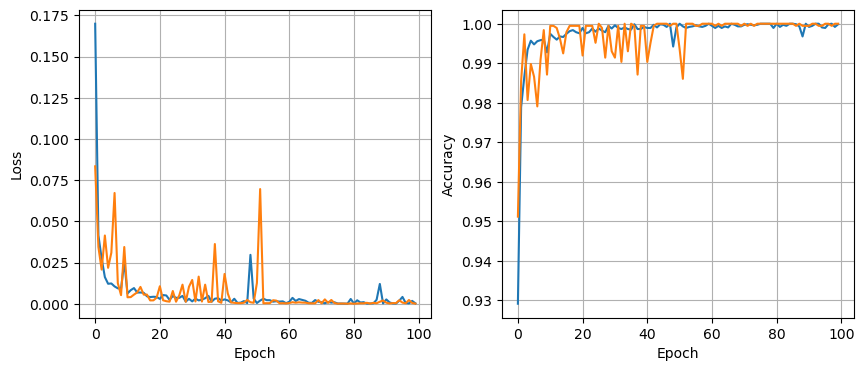

16 nodes, dropout 0, lr 0.01, batch size 64


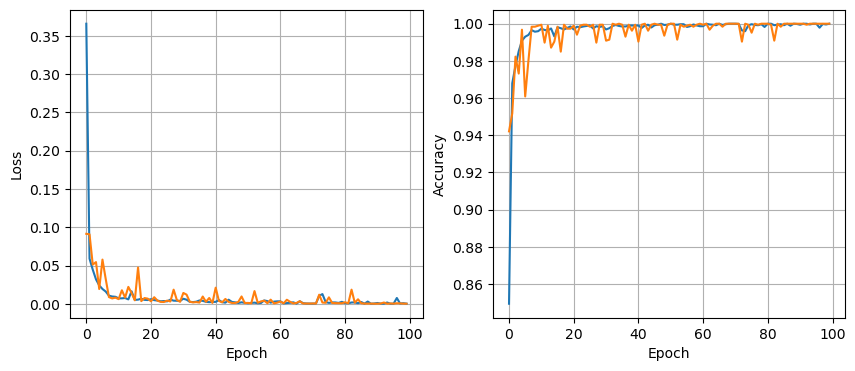

16 nodes, dropout 0, lr 0.01, batch size 128


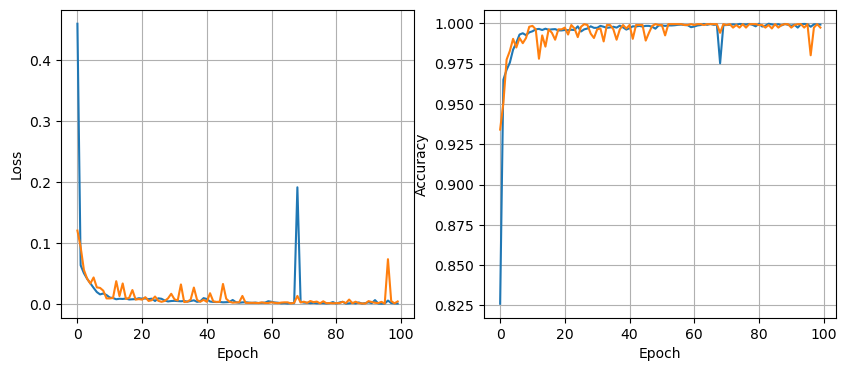

16 nodes, dropout 0, lr 0.005, batch size 32


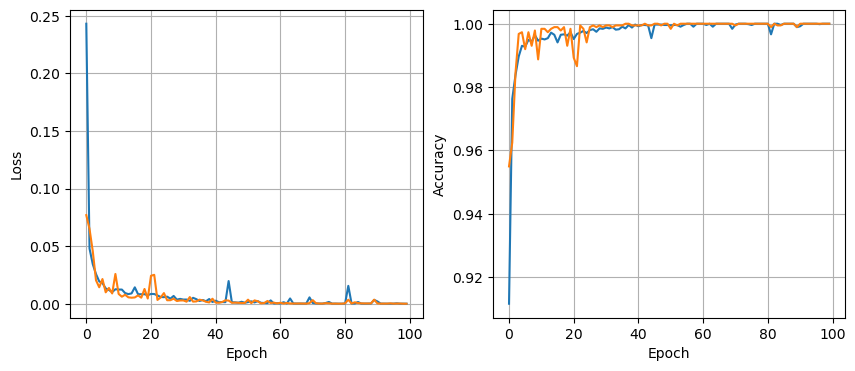

16 nodes, dropout 0, lr 0.005, batch size 64


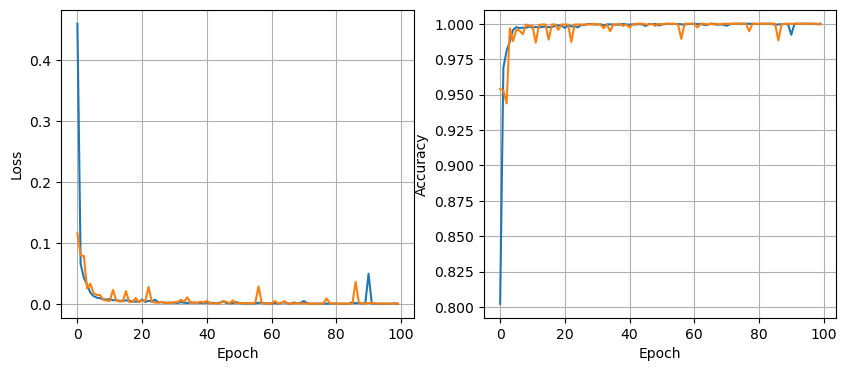

16 nodes, dropout 0, lr 0.005, batch size 128


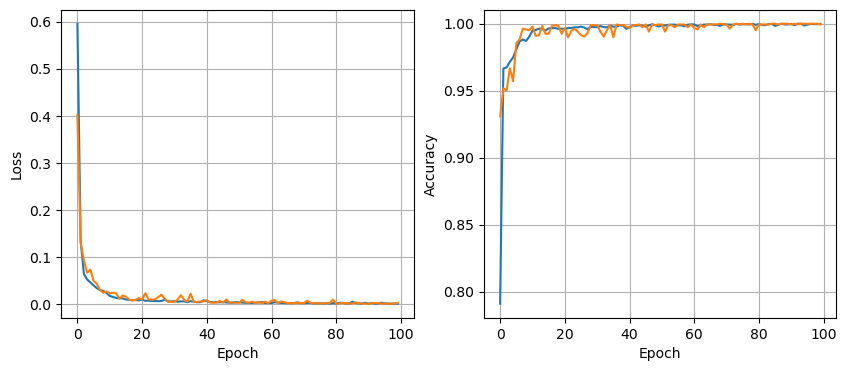

16 nodes, dropout 0, lr 0.001, batch size 32


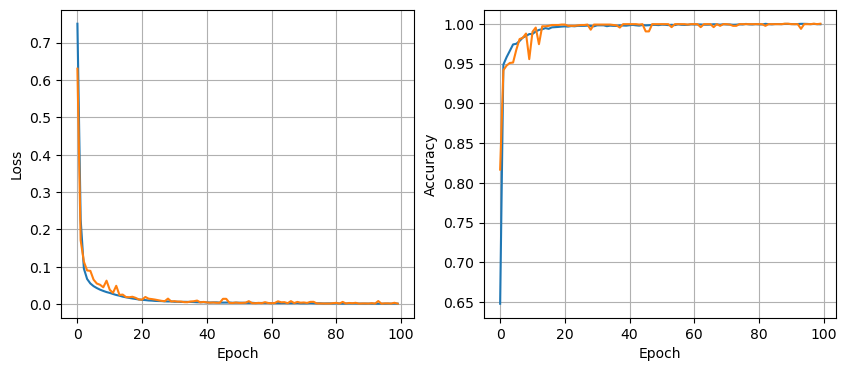

16 nodes, dropout 0, lr 0.001, batch size 64


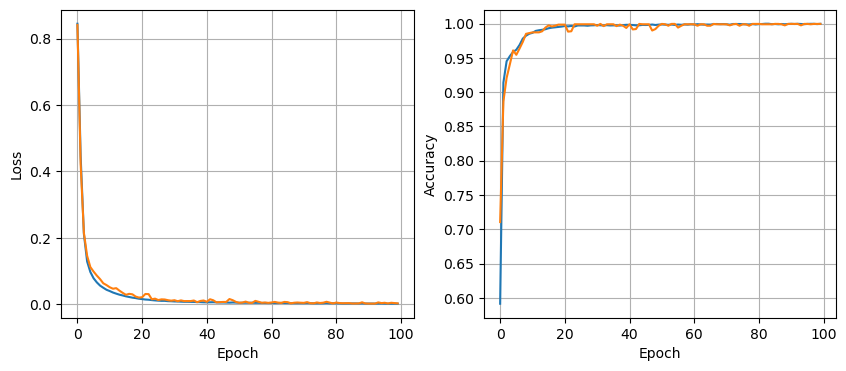

16 nodes, dropout 0, lr 0.001, batch size 128


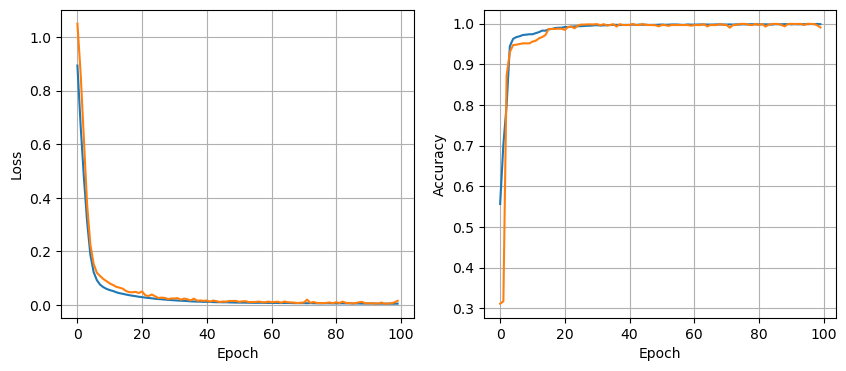

16 nodes, dropout 0.2, lr 0.01, batch size 32


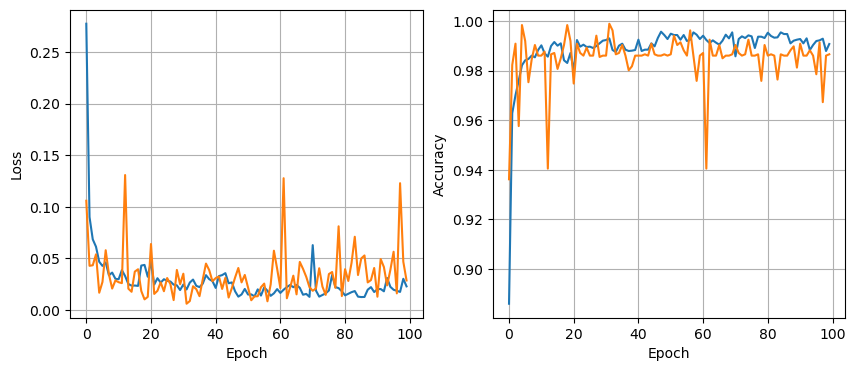

16 nodes, dropout 0.2, lr 0.01, batch size 64


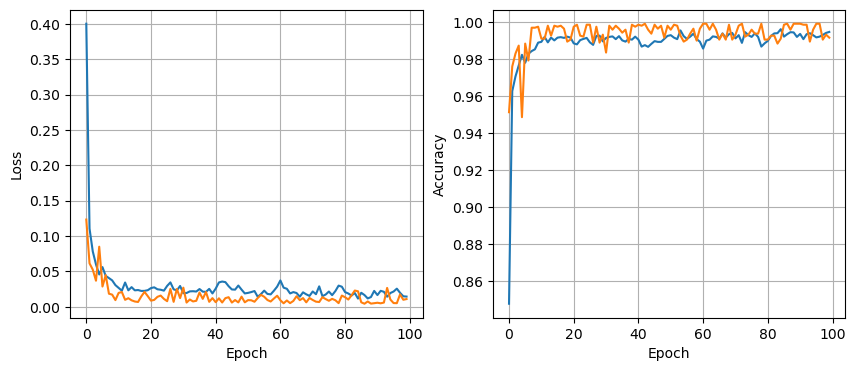

16 nodes, dropout 0.2, lr 0.01, batch size 128


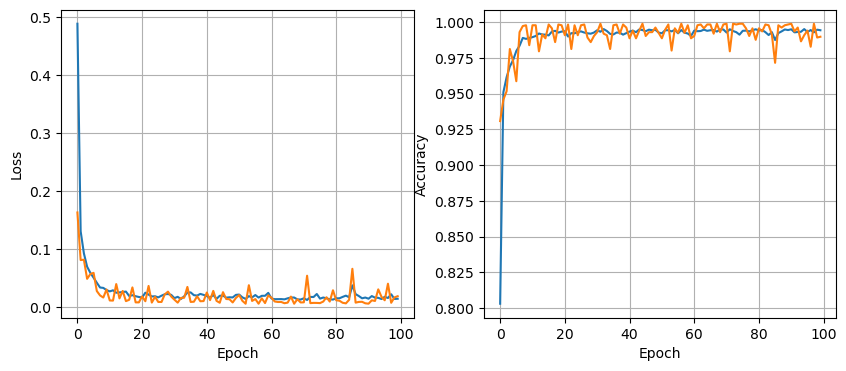

16 nodes, dropout 0.2, lr 0.005, batch size 32


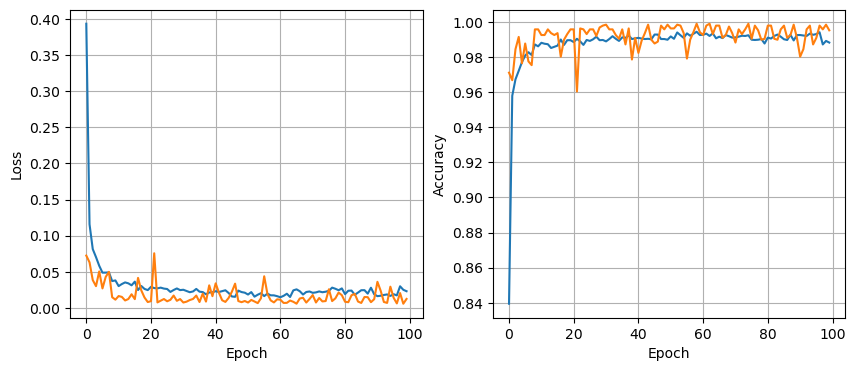

16 nodes, dropout 0.2, lr 0.005, batch size 64


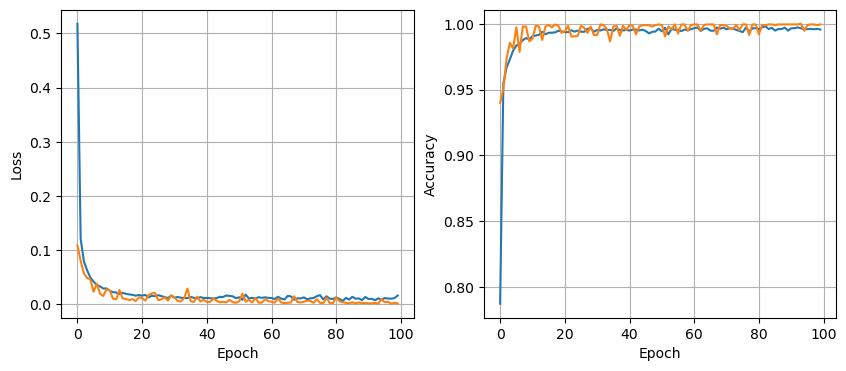

16 nodes, dropout 0.2, lr 0.005, batch size 128


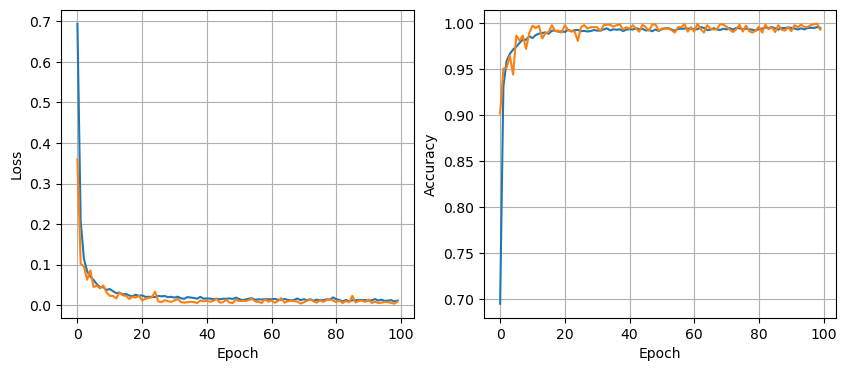

16 nodes, dropout 0.2, lr 0.001, batch size 32


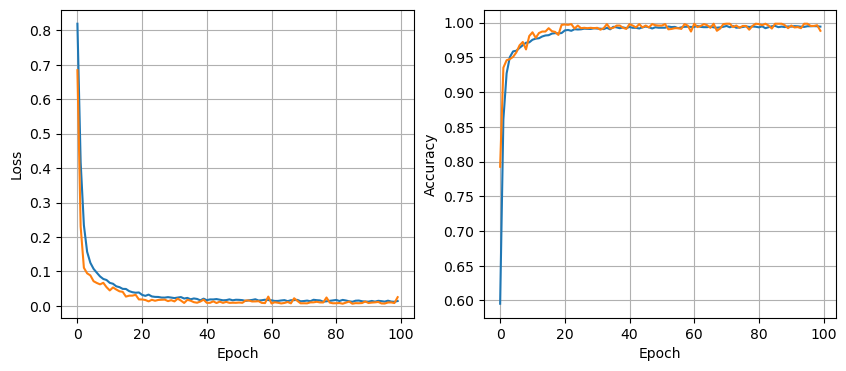

16 nodes, dropout 0.2, lr 0.001, batch size 64


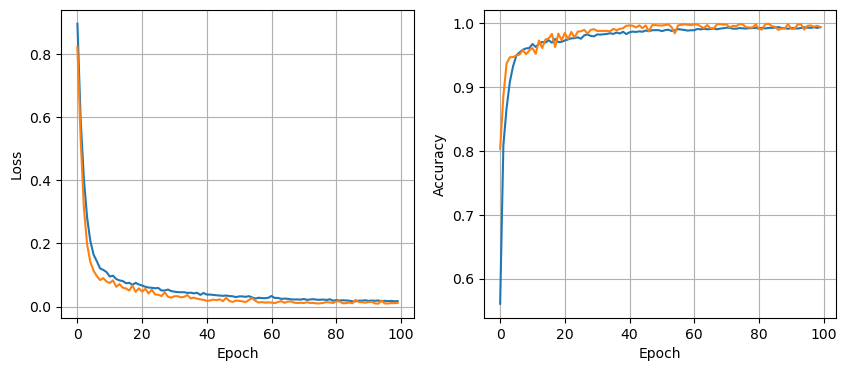

16 nodes, dropout 0.2, lr 0.001, batch size 128


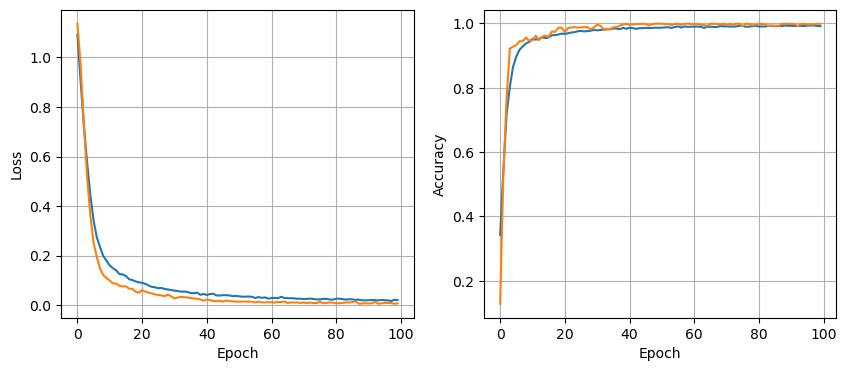

32 nodes, dropout 0, lr 0.01, batch size 32


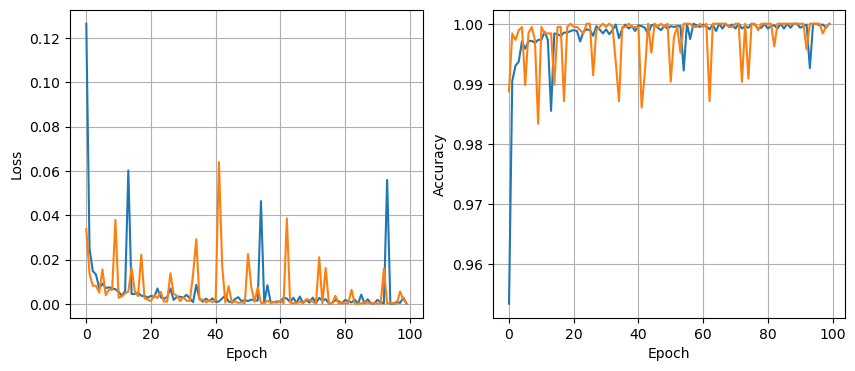

32 nodes, dropout 0, lr 0.01, batch size 64


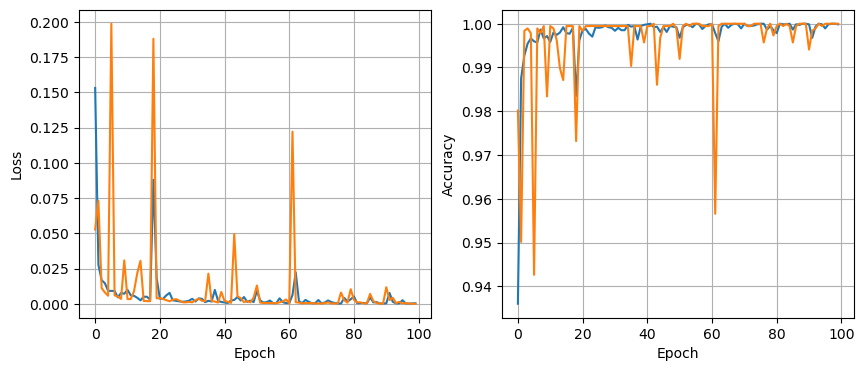

32 nodes, dropout 0, lr 0.01, batch size 128


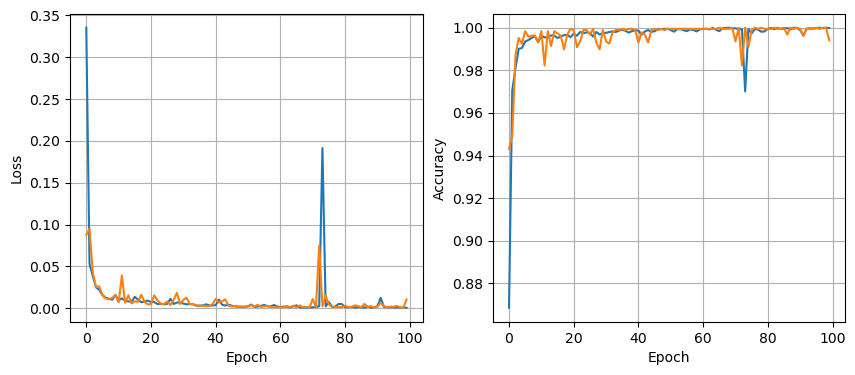

32 nodes, dropout 0, lr 0.005, batch size 32


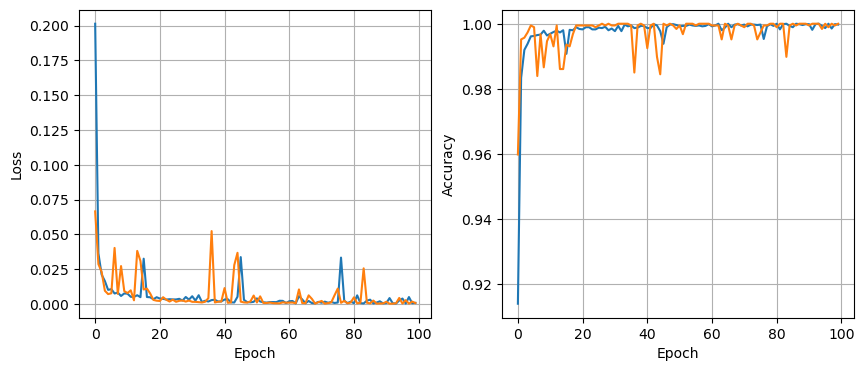

32 nodes, dropout 0, lr 0.005, batch size 64


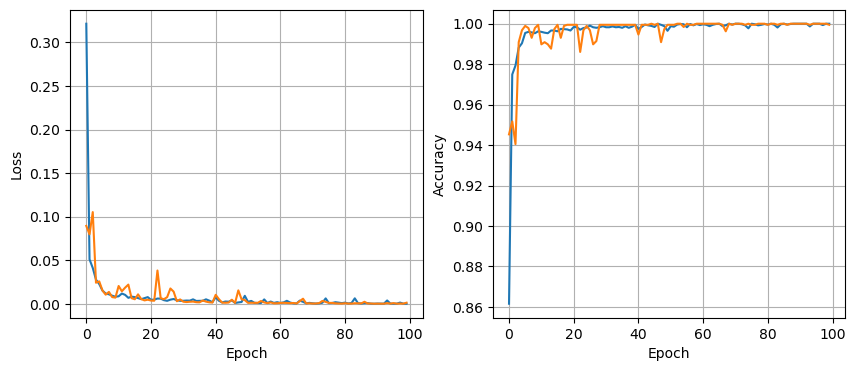

32 nodes, dropout 0, lr 0.005, batch size 128


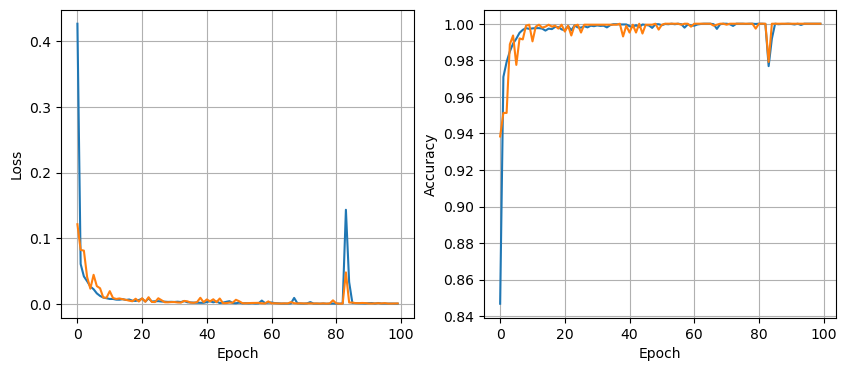

32 nodes, dropout 0, lr 0.001, batch size 32


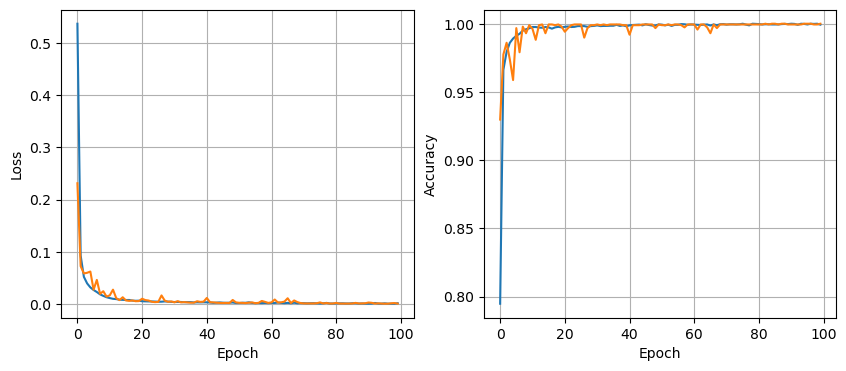

32 nodes, dropout 0, lr 0.001, batch size 64


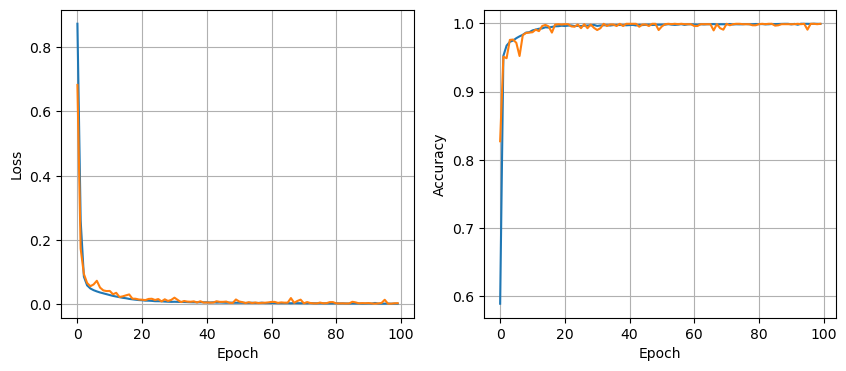

32 nodes, dropout 0, lr 0.001, batch size 128


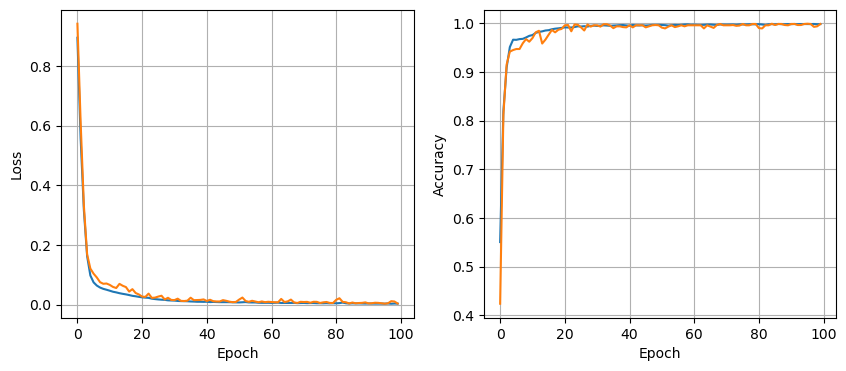

32 nodes, dropout 0.2, lr 0.01, batch size 32


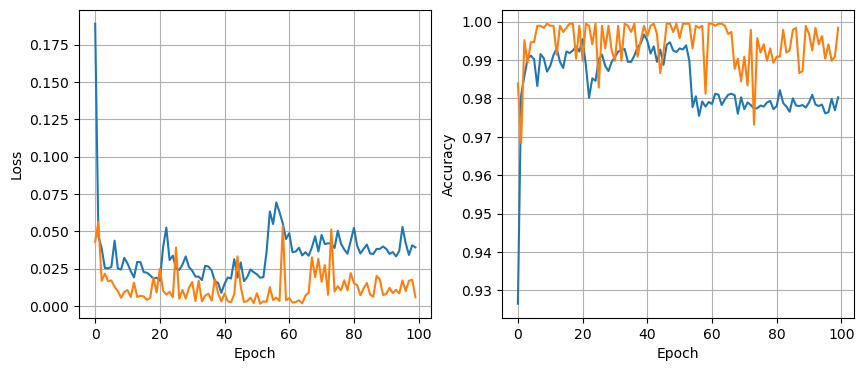

32 nodes, dropout 0.2, lr 0.01, batch size 64


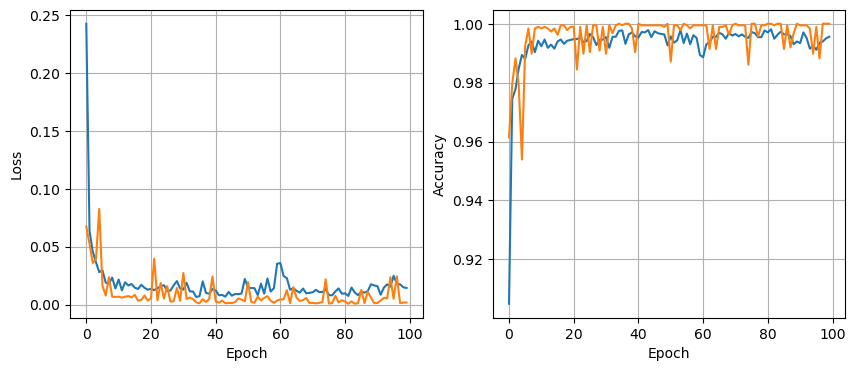

32 nodes, dropout 0.2, lr 0.01, batch size 128


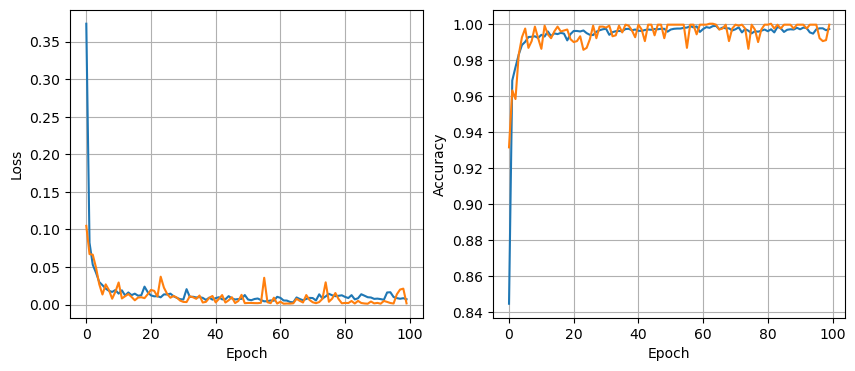

32 nodes, dropout 0.2, lr 0.005, batch size 32


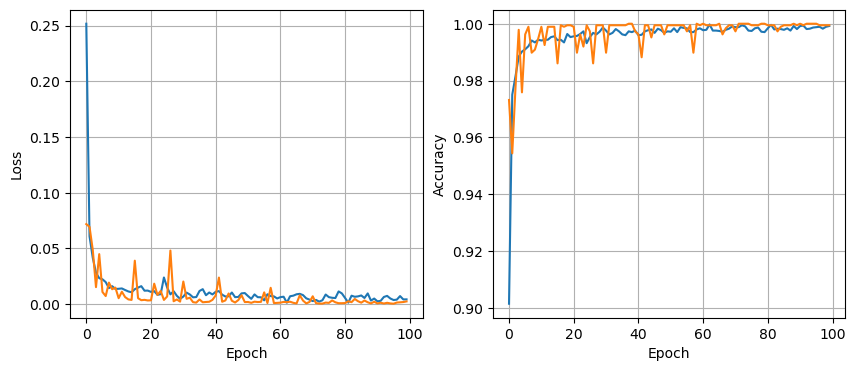

32 nodes, dropout 0.2, lr 0.005, batch size 64


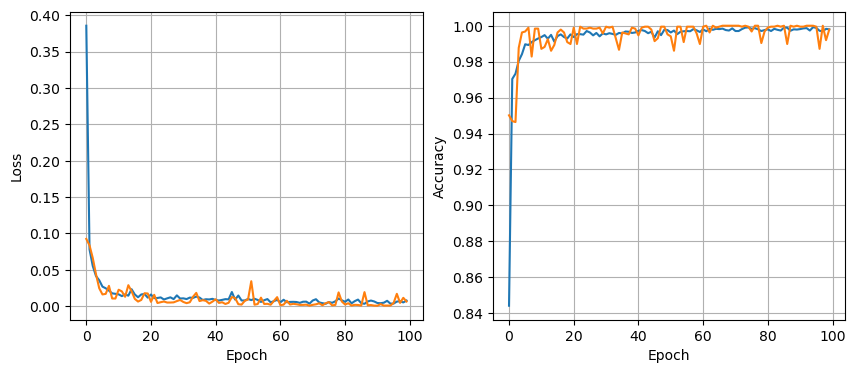

32 nodes, dropout 0.2, lr 0.005, batch size 128


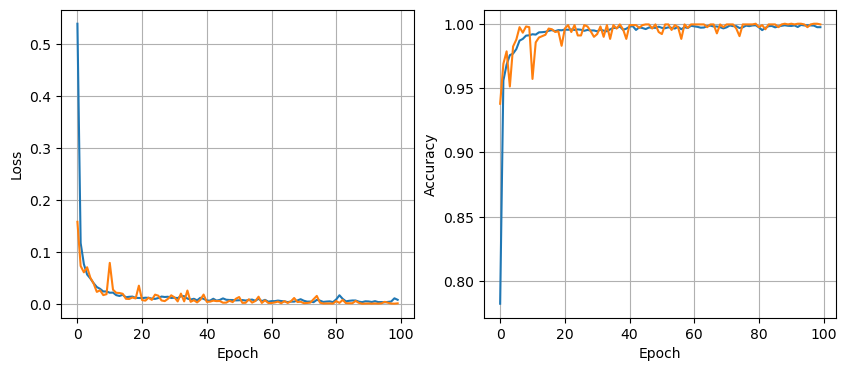

32 nodes, dropout 0.2, lr 0.001, batch size 32


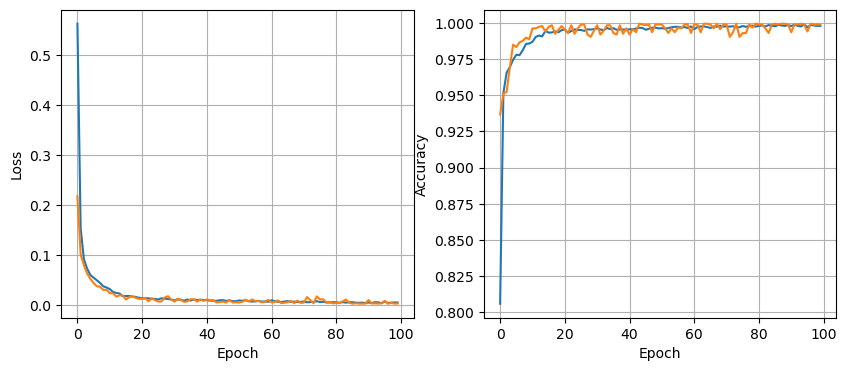

32 nodes, dropout 0.2, lr 0.001, batch size 64


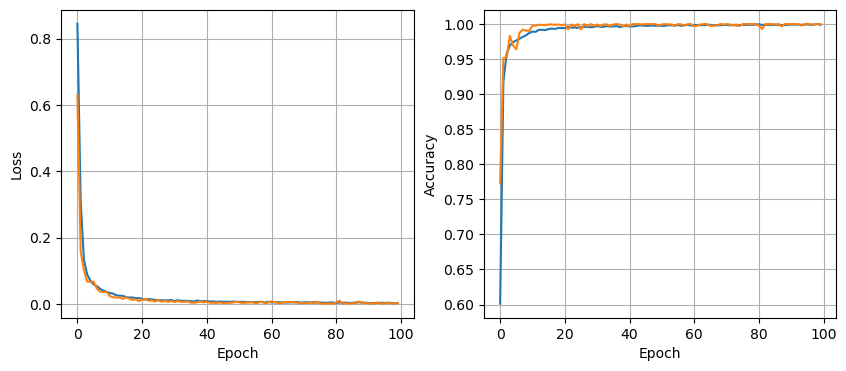

32 nodes, dropout 0.2, lr 0.001, batch size 128


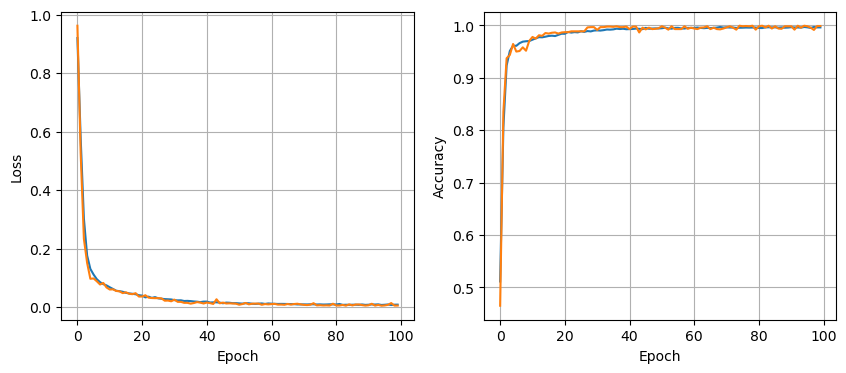

64 nodes, dropout 0, lr 0.01, batch size 32


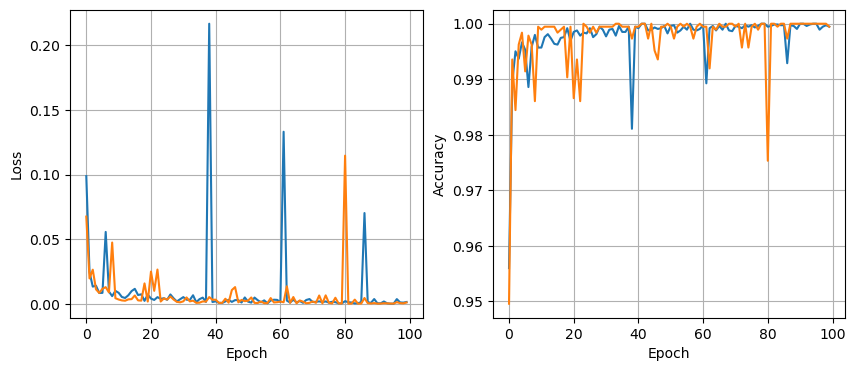

64 nodes, dropout 0, lr 0.01, batch size 64


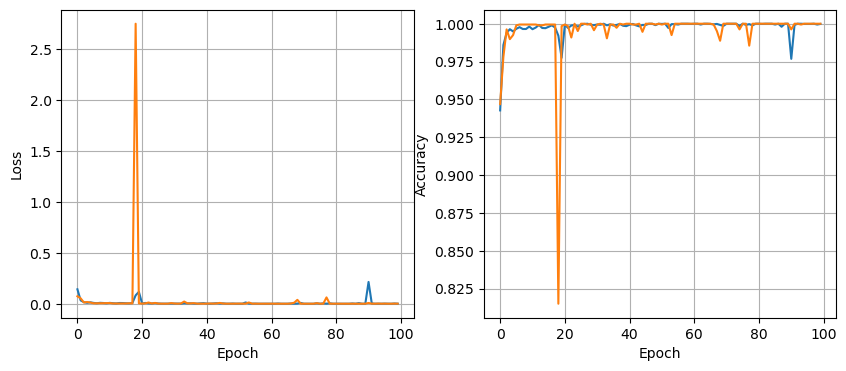

64 nodes, dropout 0, lr 0.01, batch size 128


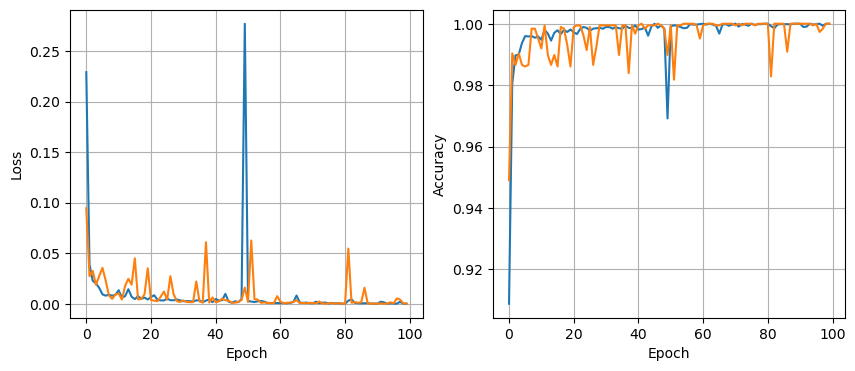

64 nodes, dropout 0, lr 0.005, batch size 32


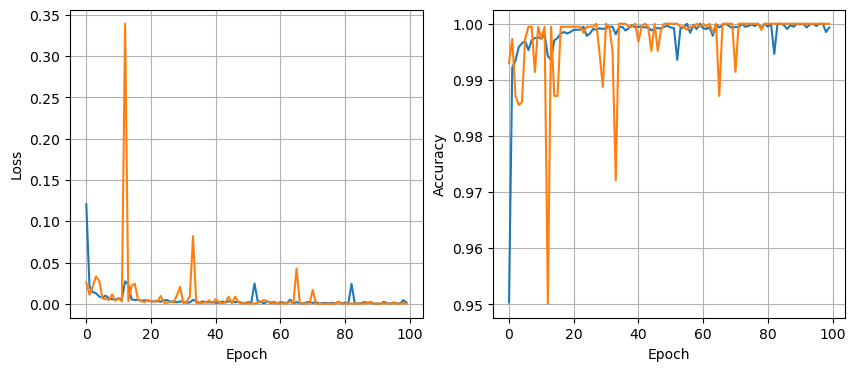

64 nodes, dropout 0, lr 0.005, batch size 64


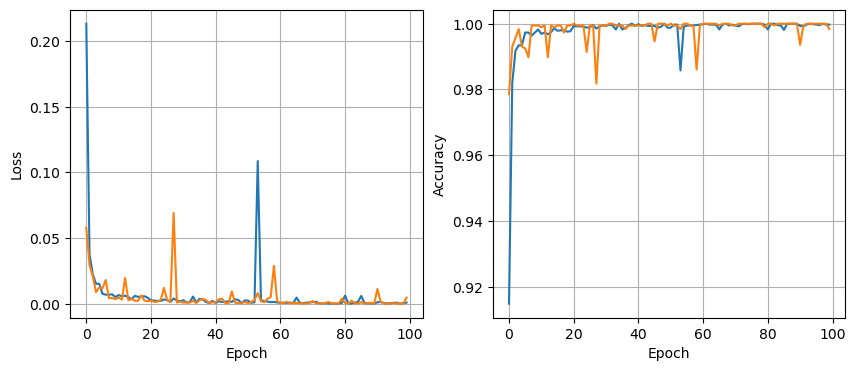

64 nodes, dropout 0, lr 0.005, batch size 128


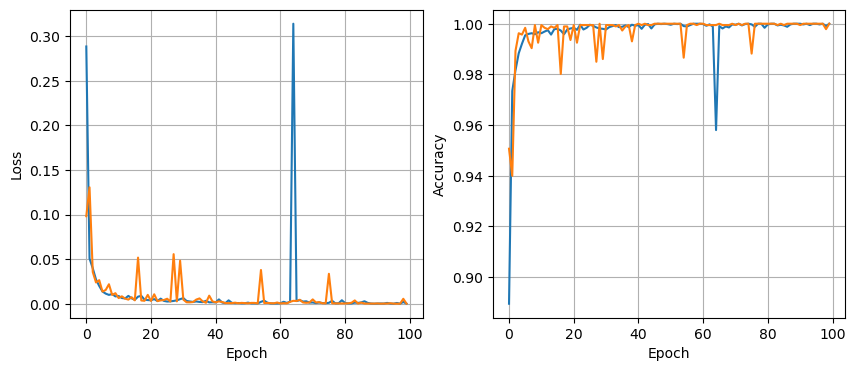

64 nodes, dropout 0, lr 0.001, batch size 32


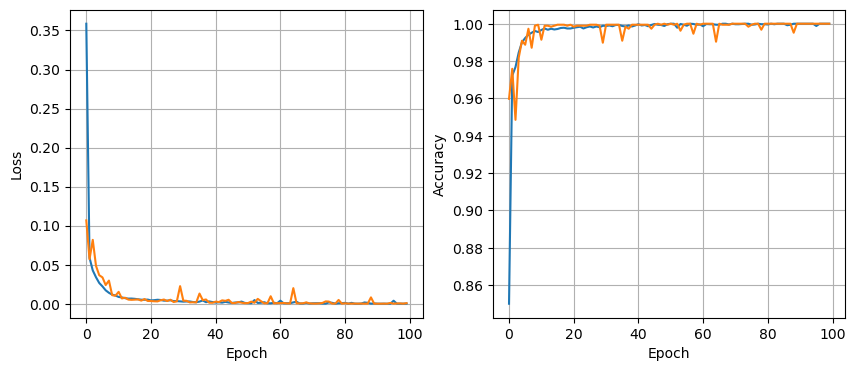

64 nodes, dropout 0, lr 0.001, batch size 64


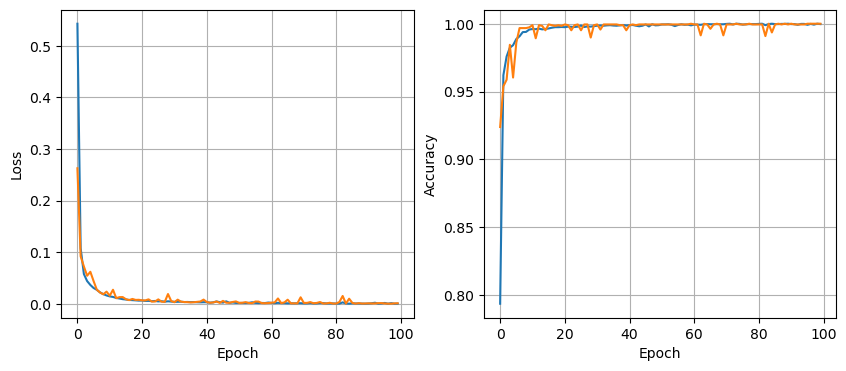

64 nodes, dropout 0, lr 0.001, batch size 128


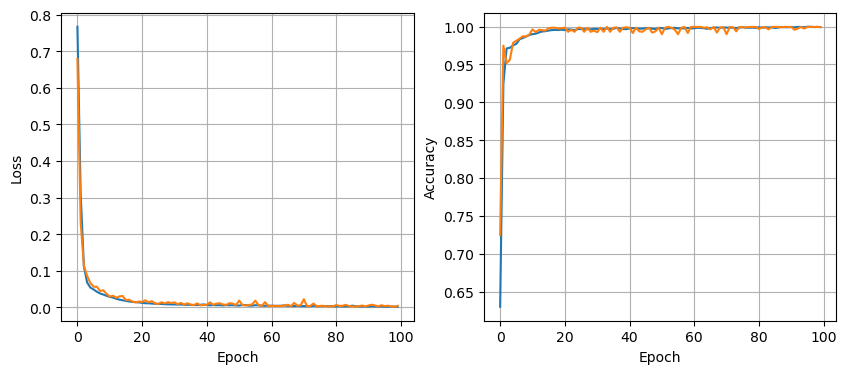

64 nodes, dropout 0.2, lr 0.01, batch size 32


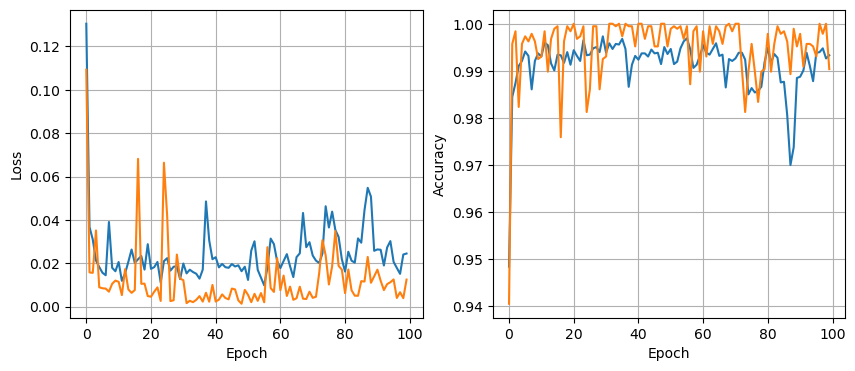

64 nodes, dropout 0.2, lr 0.01, batch size 64


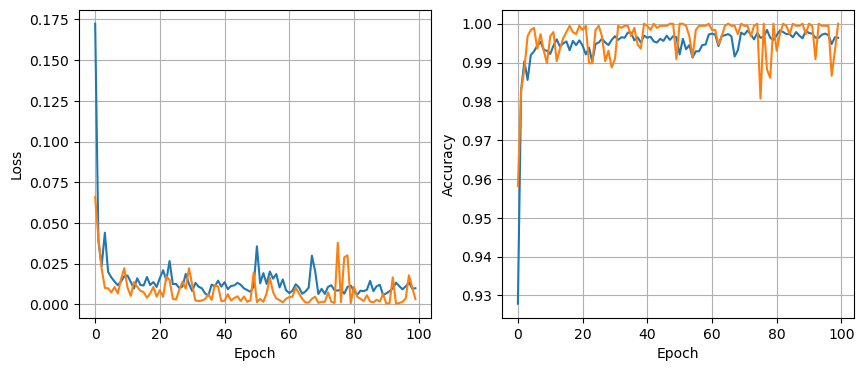

64 nodes, dropout 0.2, lr 0.01, batch size 128


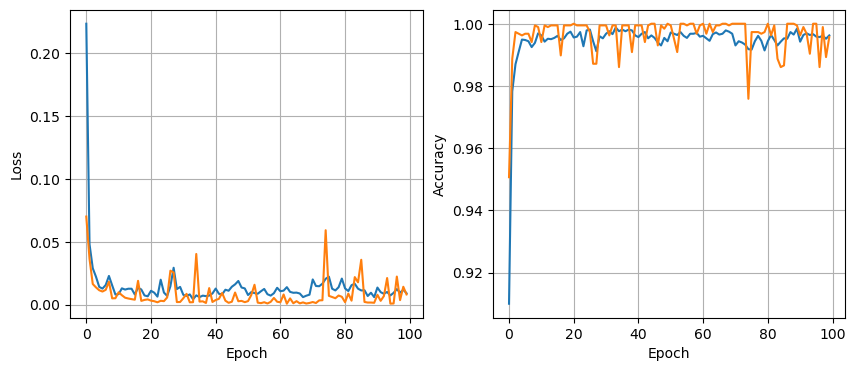

64 nodes, dropout 0.2, lr 0.005, batch size 32


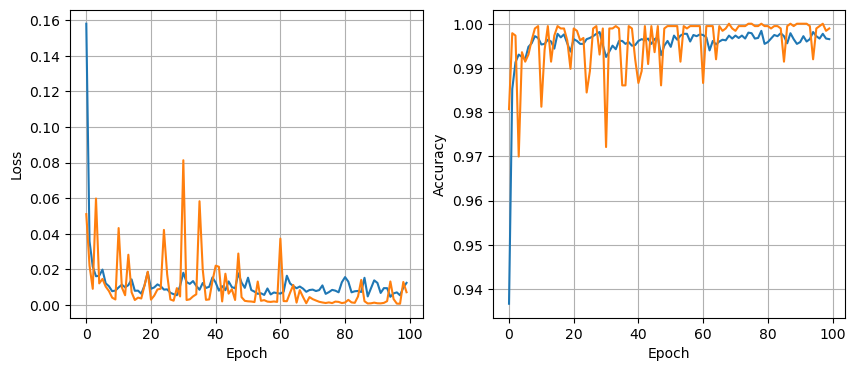

64 nodes, dropout 0.2, lr 0.005, batch size 64


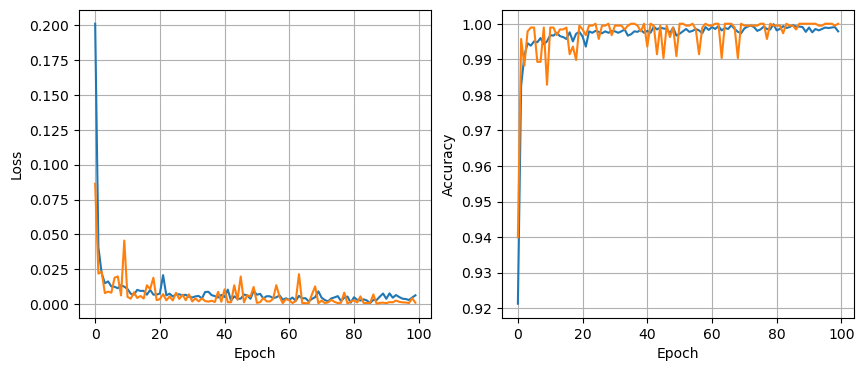

64 nodes, dropout 0.2, lr 0.005, batch size 128


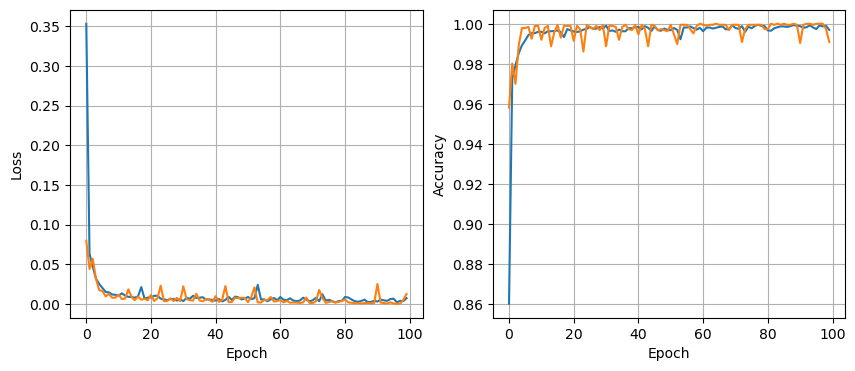

64 nodes, dropout 0.2, lr 0.001, batch size 32


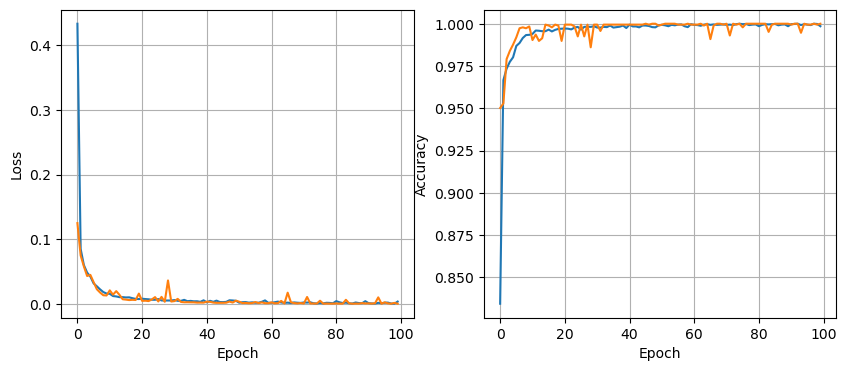

64 nodes, dropout 0.2, lr 0.001, batch size 64


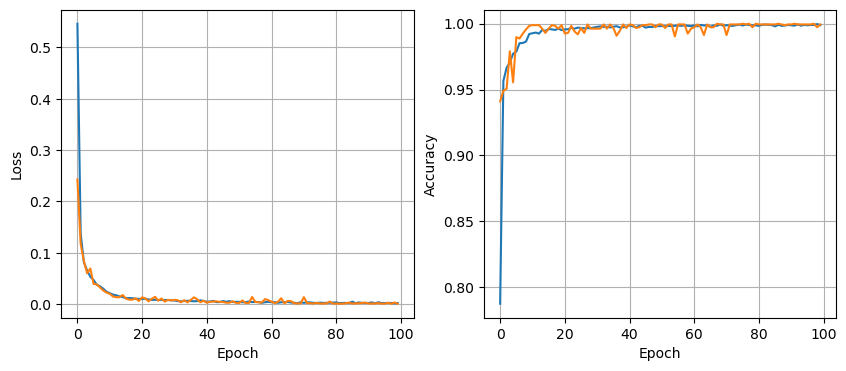

64 nodes, dropout 0.2, lr 0.001, batch size 128


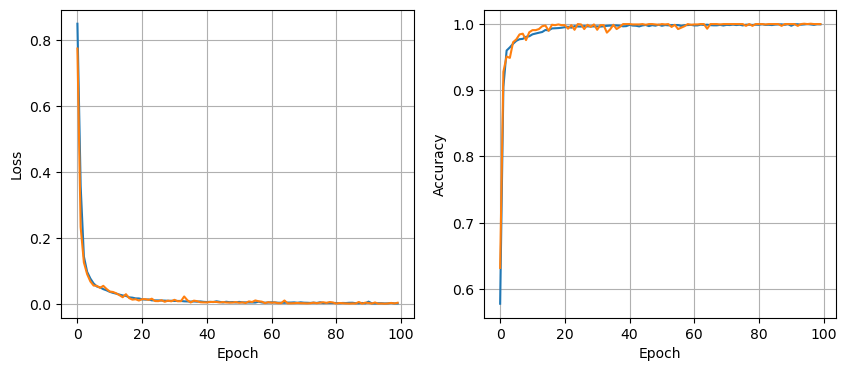

Best Hyperparameters: {'num_nodes': 32, 'dropout_prob': 0.2, 'lr': 0.01, 'batch_size': 128}
Validation Loss of the Best Model: 0.004863663110882044


In [117]:
least_val_loss = float('inf')
best_hyperparameters = None
best_model = None
epochs = 100
num_classes = 3

for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.1, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs, num_classes)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid, verbose=0)
                if val_loss[0] < least_val_loss:
                    least_val_loss = val_loss[0]
                    best_hyperparameters = {'num_nodes': num_nodes, 'dropout_prob': dropout_prob, 'lr': lr, 'batch_size': batch_size}
                    best_model = model
                    # Save the trained model
                    model.save('model.h5')
    

print("Best Hyperparameters:", best_hyperparameters)
print("Validation Loss of the Best Model:", least_val_loss)

In [118]:
# Assuming you've already loaded and preprocessed your test data as X_test and y_test
y_pred = model.predict(X_test)

# Convert the predicted probabilities to class labels (assuming you have three classes)
y_pred_classes = y_pred.argmax(axis=-1)

# Generate the classification report
class_names = ["Fresh", "Rancid", "Spoiled"]  # Replace with your actual class labels
report = classification_report(y_test, y_pred_classes, target_names=class_names)

# Print the classification report
print(report)

84/84 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

       Fresh       1.00      1.00      1.00       670
      Rancid       1.00      1.00      1.00       957
     Spoiled       1.00      1.00      1.00      1036

    accuracy                           1.00      2663
   macro avg       1.00      1.00      1.00      2663
weighted avg       1.00      1.00      1.00      2663



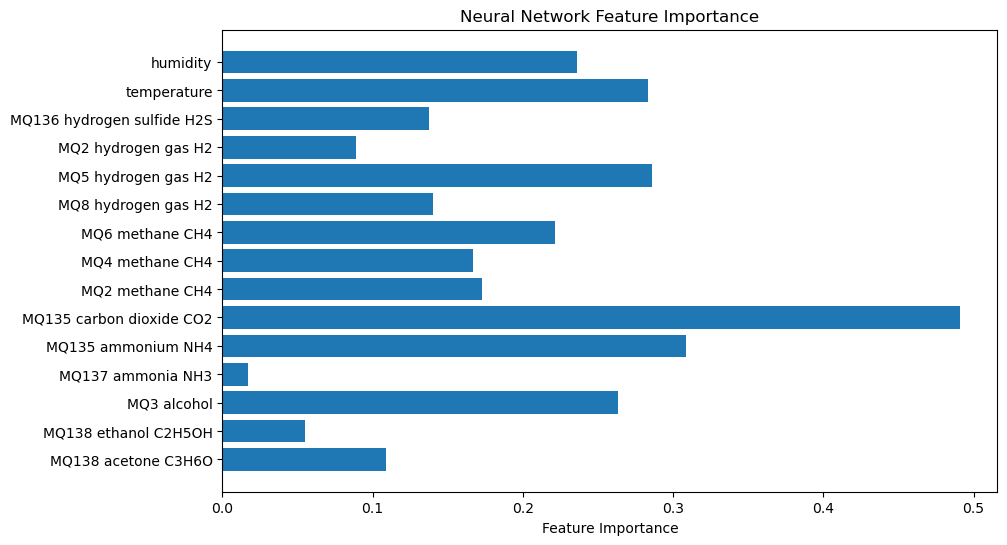

In [119]:
# Load your trained model
model = tf.keras.models.load_model('model.h5')

# Get the input layer from your model
input_layer = model.get_layer(index=0)

# Retrieve the first layer's weights and biases
weights, biases = input_layer.get_weights()

# Define the feature names
feature_names = ["MQ138 acetone C3H6O","MQ138 ethanol C2H5OH","MQ3 alcohol","MQ137 ammonia NH3","MQ135 ammonium NH4","MQ135 carbon dioxide CO2","MQ2 methane CH4","MQ4 methane CH4","MQ6 methane CH4","MQ8 hydrogen gas H2","MQ5 hydrogen gas H2","MQ2 hydrogen gas H2","MQ136 hydrogen sulfide H2S","temperature","humidity"]

# Reshape the weights to match the number of features
feature_importance = np.abs(weights).reshape(-1)[:len(feature_names)]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Neural Network Feature Importance')
plt.show()

In [120]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [ ]:
import tensorflow as tf

# Load the pre-trained model
model = tf.keras.models.load_model('model.h5')

# Access weights and biases of the layers
weights_biases = {}

for layer in model.layers:
    layer_name = layer.name

    # Check if the layer has trainable parameters
    if layer.get_weights():
        weights, biases = layer.get_weights()
        weights_biases[layer_name] = {'weights': weights, 'biases': biases}
    else:
        weights_biases[layer_name] = {'weights': None, 'biases': None}

# Save weights and biases to a file
with open("weights_and_biases.txt", "w") as f:
    for layer_name, values in weights_biases.items():
        f.write(f"Layer: {layer_name}\n")
        if values['weights'] is not None:
            f.write(f"Weights:\n{values['weights']}\n")
        else:
            f.write("No trainable weights\n")
        if values['biases'] is not None:
            f.write(f"Biases:\n{values['biases']}\n")
        else:
            f.write("No trainable biases\n")
        f.write("\n")
